In [1]:
from sklearn.datasets import fetch_openml
import pandas as pd
import numpy as np


dataset = fetch_openml(data_id=187 , as_frame=True)
df = dataset.frame
df.head(5)

,class,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280%2FOD315_of_diluted_wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [2]:
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   class                           178 non-null    category
 1   Alcohol                         178 non-null    float64 
 2   Malic_acid                      178 non-null    float64 
 3   Ash                             178 non-null    float64 
 4   Alcalinity_of_ash               178 non-null    float64 
 5   Magnesium                       178 non-null    int64   
 6   Total_phenols                   178 non-null    float64 
 7   Flavanoids                      178 non-null    float64 
 8   Nonflavanoid_phenols            178 non-null    float64 
 9   Proanthocyanins                 178 non-null    float64 
 10  Color_intensity                 178 non-null    float64 
 11  Hue                             178 non-null    float64 
 12  OD280%2FOD315_of_dilut

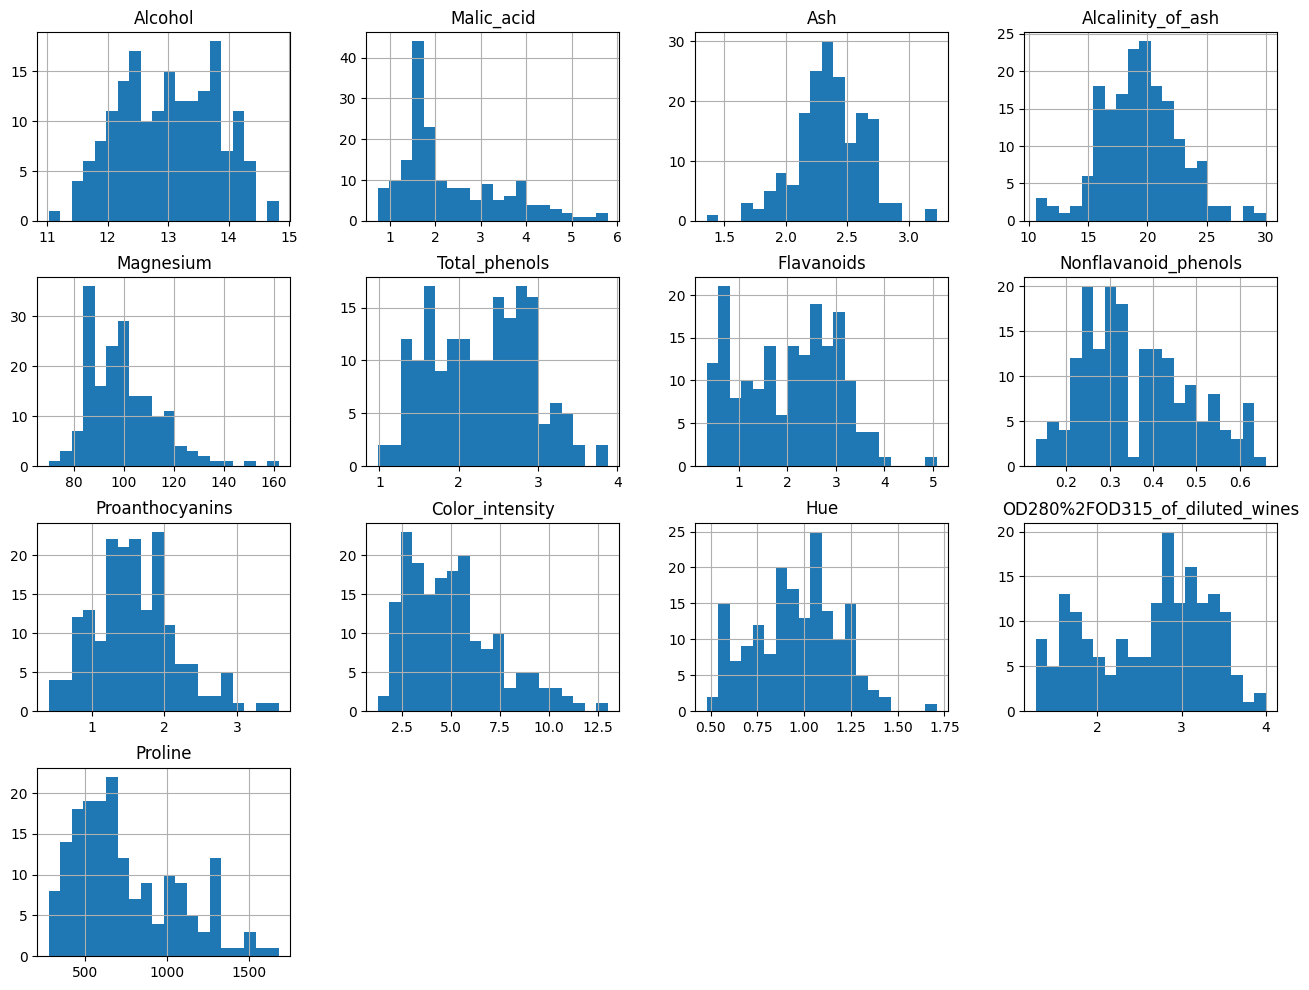

In [3]:
df.hist(bins = 20, figsize=(16, 12));

Text(0.5, 1.0, 'Correlation Matrix')

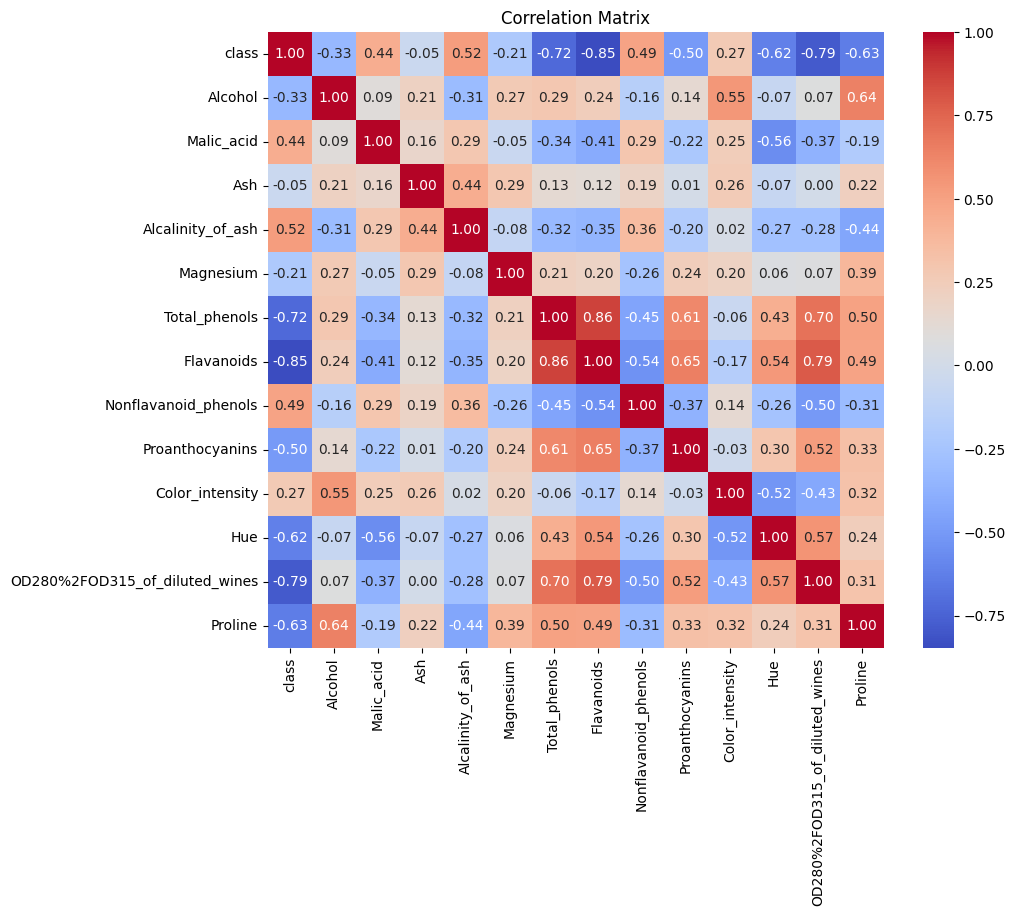

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# محاسبه ماتریس همبستگی
corr_matrix = df.corr()

# رسم heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("Correlation Matrix")

In [5]:
df['class'].value_counts(normalize=True)


,proportion
class,
2,0.398876
1,0.331461
3,0.269663


In [6]:
x = df.drop(columns='class')
y = df['class']

In [7]:
from sklearn.model_selection import train_test_split

x_train , x_test , y_train , y_test = train_test_split(x , y , train_size=0.2 , random_state=42 , stratify = y)

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

pipe = Pipeline ([
    ('clf',RandomForestClassifier())
])

In [8]:
from sklearn.tree import DecisionTreeClassifier

# یک درخت ساده برای استخراج مسیر هرس می‌سازیم
dt = DecisionTreeClassifier(random_state=42)
path = dt.cost_complexity_pruning_path(x_train, y_train)

# گرفتن مقادیر alpha
ccp_alphas = path.ccp_alphas

# نمایش چند مقدار ابتدایی alpha
print("مقادیر ccp_alpha موجود:")
print(ccp_alphas[:10])  # فقط اولی‌ها رو نشون میدیم


مقادیر ccp_alpha موجود:
[0.         0.05142857 0.28363636 0.3212616 ]


In [9]:
# انتخاب چند مقدار غیرتکراری و مهم از ccp_alpha
unique_alphas = sorted(set(np.round(ccp_alphas, 4)))
selected_alphas = unique_alphas[:5]  # فقط ۵ تای اول برای شروع

print("مقادیر انتخاب‌شده برای GridSearch:")
print(selected_alphas)


مقادیر انتخاب‌شده برای GridSearch:
[np.float64(0.0), np.float64(0.0514), np.float64(0.2836), np.float64(0.3213)]


In [20]:
from sklearn.model_selection import GridSearchCV


param_grid = {
    'clf__n_estimators': [100, 200],
    'clf__max_depth': [None, 10, 20],
    'clf__min_samples_split': [2, 5],
    'clf__min_samples_leaf': [1, 2],
    'clf__max_features': ['sqrt', 'log2'],
    'clf__ccp_alpha': selected_alphas
}

# ساخت گرید سرچ با 5-fold cross-validation
grid_search = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=2
)


grid_search.fit(x, y)


Fitting 5 folds for each of 192 candidates, totalling 960 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('clf', RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'clf__ccp_alpha': [np.float64(0.0), np.float64(0.0514),
                                            np.float64(0.2836),
                                            np.float64(0.3213)],
                         'clf__max_depth': [None, 10, 20],
                         'clf__max_features': ['sqrt', 'log2'],
                         'clf__min_samples_leaf': [1, 2],
                         'clf__min_samples_split': [2, 5],
                         'clf__n_estimators': [100, 200]},
             scoring='accuracy', verbose=2)

In [23]:
Best_parameters=grid_search.best_params_
best_model = grid_search.best_estimator_
Best_parameters

{'clf__ccp_alpha': np.float64(0.0),
 'clf__max_depth': 10,
 'clf__max_features': 'log2',
 'clf__min_samples_leaf': 2,
 'clf__min_samples_split': 5,
 'clf__n_estimators': 200}

In [29]:
y_pred = grid_search.predict(x_test)
y_proba = grid_search.predict_proba(x_test)

In [26]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, roc_curve

In [30]:
print("Classification Report:")
print(classification_report(y_test, y_pred))
roc_auc = roc_auc_score(y_test, y_proba, multi_class='ovr')
print("ROC AUC Score:", roc_auc)

Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        47
           2       1.00      1.00      1.00        57
           3       1.00      1.00      1.00        39

    accuracy                           1.00       143
   macro avg       1.00      1.00      1.00       143
weighted avg       1.00      1.00      1.00       143

ROC AUC Score: 1.0


Text(0.5, 1.0, 'Confusion Matrix')

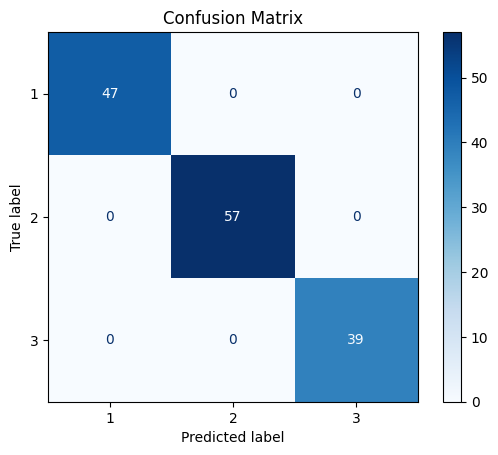

In [32]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=grid_search.classes_)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')


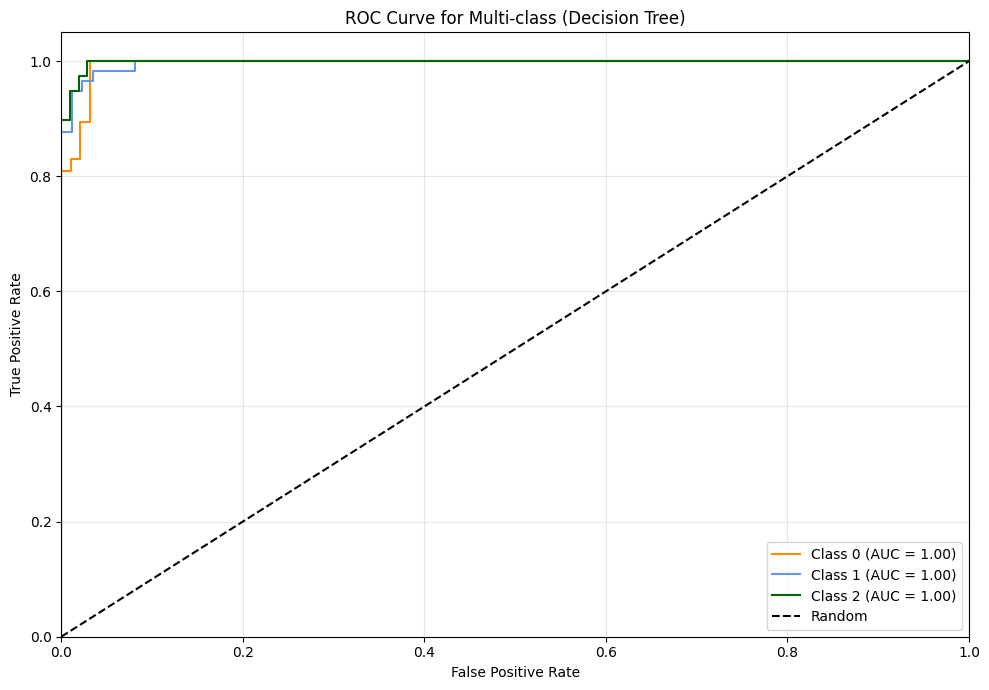

In [35]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt
from sklearn.multiclass import OneVsRestClassifier

# باینری‌سازی لیبل‌ها (برای ROC چندکلاسه لازمه)
y_test_bin = label_binarize(y_test, classes=np.unique(y))
n_classes = y_test_bin.shape[1]


clf = RandomForestClassifier(min_samples_split=10, random_state=42)
ovr_clf = OneVsRestClassifier(clf)
ovr_clf.fit(x_train, label_binarize(y_train, classes=np.unique(y)))

# پیش‌بینی احتمال‌ها
y_score = ovr_clf.predict_proba(x_test)

# رسم ROC برای هر کلاس
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# رسم نمودار
plt.figure(figsize=(10, 7))
colors = ['darkorange', 'cornflowerblue', 'darkgreen']
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], color=colors[i],
             label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multi-class (Decision Tree)')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

In [38]:
from sklearn.metrics import accuracy_score

# پیش‌بینی
y_train_pred = grid_search.predict(x_train)
y_test_pred = grid_search.predict(x_test)

# محاسبه دقت
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print(f"Train Accuracy: {train_acc:.3f}")
print(f"Test Accuracy : {test_acc:.3f}")


Train Accuracy: 1.000
Test Accuracy : 1.000


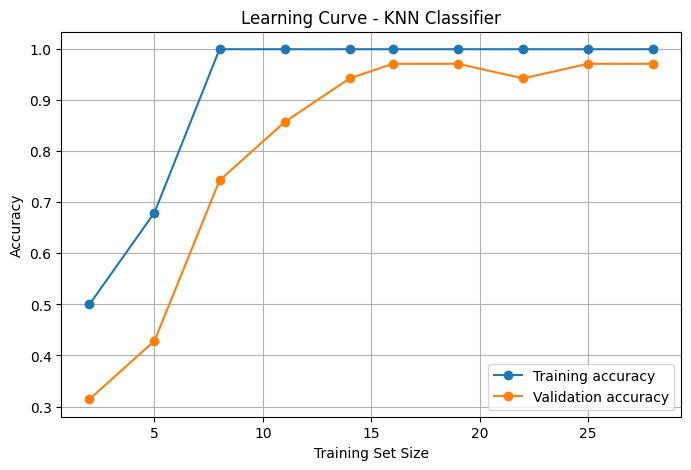

In [37]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

# محاسبه learning curve
train_sizes, train_scores, test_scores = learning_curve(
    estimator=grid_search.best_estimator_,
    X=x_train,
    y=y_train,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

# میانگین امتیازها
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

# رسم نمودار
plt.figure(figsize=(8, 5))
plt.plot(train_sizes, train_mean, 'o-', label='Training accuracy')
plt.plot(train_sizes, test_mean, 'o-', label='Validation accuracy')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Learning Curve -  Classifier')
plt.legend()
plt.grid(True)
plt.show()